In [1]:
using Pkg
Pkg.activate("/media/mat/HDD/AdaptiveTransportMap/")

 Activating environment at `/media/mat/HDD/AdaptiveTransportMap/Project.toml`


In [2]:
using Revise
using AdaptiveTransportMap
using LinearAlgebra
import LinearAlgebra: ldiv!, dot
using Test
using ForwardDiff
using BenchmarkTools
using TransportMap
using QuadGK
using Distributions
using Random
using LoopVectorization
using Test
using SparseArrays
using AdaptiveTransportMap: vander, transform!, evaluate, ncoeff, optimize, negative_log_likelihood!, derivative
using Quadrature
using Cubature
using FiniteDiff
using Test

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/AN696/src/RecipesBase.jl:117


### Gradient and Hessian of the log pdf

In [3]:
using LinearAlgebra
using SparseArrays 

N = 200
Nx = 20

dim = [1; 2; 5; 8; 10; 14; 17; 20]

@time A  = sparse(repeat(1:N, length(dim)), vcat([i*ones(Int64, N) for i in dim]...), zeros(N*length(dim)), N, Nx)

  0.246227 seconds (851.98 k allocations: 43.563 MiB)


200×20 SparseMatrixCSC{Float64,Int64} with 1600 stored entries:
  [1  ,  1]  =  0.0
  [2  ,  1]  =  0.0
  [3  ,  1]  =  0.0
  [4  ,  1]  =  0.0
  [5  ,  1]  =  0.0
  [6  ,  1]  =  0.0
  [7  ,  1]  =  0.0
  [8  ,  1]  =  0.0
  [9  ,  1]  =  0.0
  [10 ,  1]  =  0.0
  [11 ,  1]  =  0.0
  [12 ,  1]  =  0.0
  ⋮
  [188, 20]  =  0.0
  [189, 20]  =  0.0
  [190, 20]  =  0.0
  [191, 20]  =  0.0
  [192, 20]  =  0.0
  [193, 20]  =  0.0
  [194, 20]  =  0.0
  [195, 20]  =  0.0
  [196, 20]  =  0.0
  [197, 20]  =  0.0
  [198, 20]  =  0.0
  [199, 20]  =  0.0
  [200, 20]  =  0.0

In [19]:
Nx = 80
Ne = 200
m = 10

X = randn(Nx, Ne) .* randn(Nx, Ne) .+ randn(Nx)

C = MapComponent(m, Nx);

In [23]:
@time C, _ = optimize(C, X, 5; withqr = true)

  0.113092 seconds (633.72 k allocations: 115.822 MiB, 10.16% gc time)


(MapComponent(10, 5, 80, IntegratedFunction(10, 5, 80, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 5, 80, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 80), [0 0 … 0 1; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], [1, 14, 29, 80], [2.947833087140822, -1.4612573457709963, -1.1066552807775005, 0.5139837710055396, 0.8890353035382721]))), 1.0e-6), [1.681281488011168, 1.2765046973832128, 1.2484795329905145, 1.238232503940972, 1.2269898034828788, 1.2147181601898451])

In [33]:
@time for i=1:Ne
    hess_x_log_pdf(C, X[:,i:i])
end

  0.126218 seconds (1.06 M allocations: 86.695 MiB, 8.66% gc time)


In [36]:
@time hess_x_log_pdf(C, X[:,1:1])

  0.001182 seconds (5.31 k allocations: 443.672 KiB)


1×80×80 Array{Float64,3}:
[:, :, 1] =
 0.241119  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.460623

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

...

[:, :, 78] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 79] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 80] =
 0.460623  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  -1.72678

In [13]:
using Plots

In [10]:
M = HermiteMap(m, X);
@time optimize(M, X, 10; withqr = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.482900 seconds (938.57 k allocations: 301.988 MiB, 9.44% gc time)


HermiteMap(10, 8, LinearTransform(8, [1.4432899320127036e-17, 1.2212453270876723e-16, 3.552713678800501e-17, 3.538835890992686e-17, 8.881784197001253e-18, -4.3021142204224816e-18, -2.997602166487923e-16, -4.773959005888173e-17], [1.0000000000000004 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0000000000000002 0.0; 0.0 0.0 … 0.0 0.9999999999999996], true), MapComponent[MapComponent(10, 10, 1, IntegratedFunction(10, 10, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 9; 10], [1], [-0.17031642908974737, -2.5109314416189386, -1.22645803876244, -9.054257749530365, -5.682873035961211, -10.742543984439571, -9.726539366451775, -7.821656310631472, -4.907227197804628, -1.8432420820493216]))), 1.0e-6), MapComponent(10, 10, 2, IntegratedFunction(10, 10, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 2, MultiBasis(Basis of 10 functions: Consta

In [6]:
@time grad_x_log_pdf(M, X)

  3.856417 seconds (9.35 M allocations: 863.526 MiB, 3.73% gc time)


200×80 Array{Float64,2}:
 -2.12838   -0.524464    1.97852   …  -0.00866443  -1.8021     0.519367
  1.73324   -1.35326     1.17204       0.144907    -0.429345  -0.577886
 -0.756161   2.05738    -3.4372       -1.49649     -0.227982  -1.23262
 -0.112083   1.07242     0.180696      0.126996    -1.20886   -0.0569585
  1.21815   -1.60656     1.20079      -0.0223136   -1.39148    1.0348
 -1.0865    -1.1931     -0.057196  …  -1.37386      0.243715  -0.458595
 -3.33103    4.72669    -1.5253       -0.0611548   -1.44565   -0.21099
 -2.19226    0.592652    2.0572       -0.909262     3.06111    0.540907
 -0.731292   0.0475403  -0.427324      0.909664     4.67169    1.00814
  6.03866    1.31779    10.2716        0.12455     -1.40938   -0.0517042
 -0.176656   0.165227    2.70689   …   0.0173186   -1.76691    0.254459
  2.73725   -0.0291816  -1.51748       0.10574     -0.743214   0.296024
 -0.553974   1.19469    -3.01912      -0.0474011   -0.517724  -1.55388
  ⋮                                ⋱       

In [7]:
@time hess_x_log_pdf(M, X)

  6.183824 seconds (14.18 M allocations: 3.431 GiB, 4.49% gc time)


200×80×80 Array{Float64,3}:
[:, :, 1] =
  -3.87737   -0.271296    -0.38409     0.297088    …  0.0  0.0  0.0  0.0  0.0
  -5.76628   -0.0758583   -0.296743   -0.0130477      0.0  0.0  0.0  0.0  0.0
   1.50737   -0.439169     0.126694    0.083416       0.0  0.0  0.0  0.0  0.0
   3.01362    0.181364    -0.414761    0.129186       0.0  0.0  0.0  0.0  0.0
  -1.4367    -0.684564    -0.425461   -0.081035       0.0  0.0  0.0  0.0  0.0
  -8.46367   -0.102582    -0.185967   -0.158676    …  0.0  0.0  0.0  0.0  0.0
  -1.76695    0.358212     0.3921      0.0456483      0.0  0.0  0.0  0.0  0.0
  -1.29052   -0.243709    -0.0493311   0.186923       0.0  0.0  0.0  0.0  0.0
  -1.50915   -0.230923    -0.02077     0.183369       0.0  0.0  0.0  0.0  0.0
  -2.73297   -0.635795    -0.441721   -0.116042       0.0  0.0  0.0  0.0  0.0
  -7.3529    -0.0376564   -0.177715   -0.0411809   …  0.0  0.0  0.0  0.0  0.0
  -6.98862   -0.244087    -0.450128   -0.0365791      0.0  0.0  0.0  0.0  0.0
  -8.13747   -0.0491356 

In [8]:
Nx = 8
Ne = 100
m = 10

X = randn(Nx, Ne) .* randn(Nx, Ne) .+ randn(Nx)

idx =  [ 0  0  0  0  0  1  0  1
         0  0  0  0  4  0  0  2
         0  1  2  3  0  0  1  0
         0  0  0  1  0  0  0  0
         0  0  1  0  0  3  0  0]

coeff =  [   0.7826236383247712
              1.6396512186057377
              1.2687650163074022
             -0.8193039185231135
             -0.8190203466485412];

In [182]:
f = ExpandedFunction(MultiBasis(CstProHermite(m-2), Nx), idx, coeff)

ExpandedFunction(10, 5, 8, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 8), [0 0 … 0 1; 0 0 … 0 2; … ; 0 0 … 0 0; 0 0 … 0 0], [2, 3, 4, 5, 6, 7, 8], [0.7826236383247712, 1.6396512186057377, 1.2687650163074022, -0.8193039185231135, -0.8190203466485412])

In [183]:
out = zeros(Ne, Nx);

In [198]:
@time G = grad_x_grad_xd(f, X)

  0.000251 seconds (284 allocations: 189.562 KiB)


100×8 SparseMatrixCSC{Float64,Int64} with 300 stored entries:
  [1  , 5]  =  -0.324907
  [2  , 5]  =  -0.250077
  [3  , 5]  =  -0.106659
  [4  , 5]  =  0.661336
  [5  , 5]  =  -0.717391
  [6  , 5]  =  0.565755
  [7  , 5]  =  -0.576917
  [8  , 5]  =  0.150128
  [9  , 5]  =  0.166284
  [10 , 5]  =  -0.0557951
  [11 , 5]  =  -0.146452
  [12 , 5]  =  0.661153
  ⋮
  [88 , 8]  =  -0.0225185
  [89 , 8]  =  -0.277108
  [90 , 8]  =  -0.248234
  [91 , 8]  =  -0.290485
  [92 , 8]  =  0.148164
  [93 , 8]  =  0.0223947
  [94 , 8]  =  -0.104531
  [95 , 8]  =  -0.00790913
  [96 , 8]  =  -0.538556
  [97 , 8]  =  0.328602
  [98 , 8]  =  -0.280009
  [99 , 8]  =  -0.136048
  [100, 8]  =  -0.0944275

In [201]:
@time hess_x_grad_xd(f, X)

  0.000245 seconds (610 allocations: 335.297 KiB)


100×8×8 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

In [193]:
any([line[5]*line[end] for line in eachslice(f.idx; dims = 1)] .> 0)

true

In [123]:
@time G = grad_x_grad_xd(f, X)

  0.000156 seconds (489 allocations: 398.922 KiB)


100×8 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0127413   -0.0241814    0.0   0.374469
 0.0  0.0  0.0  0.0   0.0332488    0.0300141    0.0   0.249963
 0.0  0.0  0.0  0.0  -0.293196     0.0183344    0.0   0.0893351
 0.0  0.0  0.0  0.0   0.41516      0.014481     0.0   0.0138916
 0.0  0.0  0.0  0.0   0.0869764    0.0381148    0.0  -0.238521
 0.0  0.0  0.0  0.0   0.37052     -0.00505007   0.0  -0.289426
 0.0  0.0  0.0  0.0  -0.00974022  -0.000454808  0.0  -0.446744
 0.0  0.0  0.0  0.0  -0.276455     0.0358006    0.0  -0.0204303
 0.0  0.0  0.0  0.0  -0.390595    -0.0126135    0.0   0.0564649
 0.0  0.0  0.0  0.0   0.644444     0.0258624    0.0  -0.0576162
 0.0  0.0  0.0  0.0   0.412609    -0.00967158   0.0  -0.0219708
 0.0  0.0  0.0  0.0   0.342315    -0.0344039    0.0  -0.293708
 0.0  0.0  0.0  0.0   0.52078     -0.00590333   0.0  -0.210495
 ⋮                                 ⋮                 
 0.0  0.0  0.0  0.0  -0.00892087  -0.00856236   0.0  -0.415115
 0.0  0.0  0.0  0.0  -0.17462     

In [210]:
hess_x_grad_xd(f, X)

100×8×8 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

In [105]:
M = HermiteMap(m, X);

In [85]:
optimize(M, X, "split"; withqr = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


HermiteMap(10, 8, LinearTransform(8, [-1.9674312600758872, 0.2327841513578278, -1.056506919792538, 0.5373681212681528, 0.9954007469453348, -0.22056228207191797, 0.11958535999553176, 0.6997747039281298], [0.9639076054277232 0.0 … 0.0 0.0; 0.0 1.067813688131628 … 0.0 0.0; … ; 0.0 0.0 … 1.0123667265164973 0.0; 0.0 0.0 … 0.0 0.9608462598687618], true), MapComponent[MapComponent(10, 10, 1, IntegratedFunction(10, 10, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 9; 10], [1], [0.34955305654557955, -3.2846964501846427, -3.5219927969936062, -16.685169764972073, -14.000989840631245, -27.526511922813725, -16.34532814115463, -21.414112149110924, -6.7848431662328705, -5.260983918363335]))), 1.0e-6), MapComponent(10, 10, 2, IntegratedFunction(10, 10, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 2, MultiBasis(Basis of 10 functions: Constant -> 8t

In [202]:
@time log_pdf(M, X)

  0.000246 seconds (1.37 k allocations: 755.000 KiB)


100-element Array{Float64,1}:
 -14.07529101487674
 -13.227716081922795
 -14.753254346537872
 -13.827666064482496
 -13.602628249466743
 -11.285889477422302
 -13.817212908998192
 -17.861659624882527
 -18.04580176868005
 -16.569610262512562
 -18.247681865569884
 -28.189131567722505
 -20.11240491521368
   ⋮
 -12.71949498868644
 -11.700552440293054
 -18.603022019721045
 -17.66405147110061
 -35.63983029830263
 -15.724078198218635
 -12.98819803500822
 -16.647001129988205
 -11.17284107036538
 -11.783775484929327
 -14.040750447206332
 -11.460018030628616

In [204]:
@time grad_x_log_pdf(M, X)

  0.001286 seconds (2.40 k allocations: 1.288 MiB)


100×8 Array{Float64,2}:
   0.335195    -3.14634    -2.34136    …  -2.2702     0.475952   -0.384433
   7.01493      2.40842     0.0880603      0.327978   0.175131   -0.857232
  -1.51296     -2.45646    -1.94238       -2.51906    0.812536   -0.0378477
  -0.0154932   -1.35254    -1.45672       -1.04537    0.262274    0.0416189
  -0.247785     0.824156   -0.617895      -1.28723   -0.46456     0.114864
  -0.270503     2.08767     0.039155   …   0.618888   0.14713    -0.60055
  -1.10407      1.29617    -0.505211      -0.936528  -0.345288    0.0373031
   1.21296     -2.11934    -1.88608        1.12489   -1.70083    -1.72249
 -18.7509      10.5713      2.86904        3.13575    0.657125    0.635462
  -0.363586    -1.74644    -1.66517       -2.3989    -0.105092   -0.17184
   6.43729      2.37757    -0.0180432  …  -0.856843   0.21129    -0.716788
  25.7591      14.6558      1.66497       -0.199616  -1.59785    -0.0758588
 -11.5397     -19.1854     -9.49858        4.87034    0.53452     1.13492
 

In [22]:
@time hess_x_log_pdf(M, X)

  0.016325 seconds (38.80 k allocations: 44.094 MiB)


100×8×8 Array{Float64,3}:
[:, :, 1] =
  -8.6731    -0.116978     0.388357   -0.543524     0.791263  0.0  0.0  0.0
 -10.9934     0.122617    -0.120598   -0.0317758    0.649227  0.0  0.0  0.0
   5.90597   -0.449718     0.66763    -0.330059    -0.115265  0.0  0.0  0.0
  -4.76381    0.32024      0.445829   -0.705058     0.440838  0.0  0.0  0.0
  -1.27063    0.126023     0.863296   -0.650393     0.422291  0.0  0.0  0.0
  -0.942428  -0.548003    -0.617943    0.630133     0.31061   0.0  0.0  0.0
  -5.65384    0.105433     0.0743771  -0.0823079    0.256242  0.0  0.0  0.0
   0.18693    0.519968     0.0742497  -0.884167     0.330545  0.0  0.0  0.0
   3.80461    0.0281726    0.940967   -0.347748     0.444506  0.0  0.0  0.0
  -7.30805    0.0809263    0.196427   -0.00774074   0.284559  0.0  0.0  0.0
  -3.57267   -0.2508       0.0802132   0.439328     0.552726  0.0  0.0  0.0
  -8.80272    0.218215     0.240688   -0.442409     0.794594  0.0  0.0  0.0
  -6.45108    0.00177636  -0.0284179   0.195026   

In [ ]:
@time hess_x_log_pdf(M, reshape(X[:,1],(Nx,1)))

In [16]:
@time hess_x_log_pdf(M, reshape(X[:,1],(Nx,1)))

  0.004294 seconds (26.03 k allocations: 1.736 MiB)


1×8×8 Array{Float64,3}:
[:, :, 1] =
 -8.6731  -0.116978  0.388357  -0.543524  0.791263  0.0  0.0  0.0

[:, :, 2] =
 -0.116978  3.44996  0.414521  0.0  0.0  0.0  0.0  0.0

[:, :, 3] =
 0.388357  0.414521  1.52155  0.827067  …  0.44165  -0.109375  0.604273

[:, :, 4] =
 -0.543524  0.0  0.827067  -3.92358  0.0  0.00937527  -0.040473  0.0

[:, :, 5] =
 0.791263  0.0  -0.0187205  0.0  -3.35089  0.0  0.0  0.0

[:, :, 6] =
 0.0  0.0  0.44165  0.00937527  0.0  -7.53913  0.109941  -0.324768

[:, :, 7] =
 0.0  0.0  -0.109375  -0.040473  0.0  0.109941  0.860028  0.0

[:, :, 8] =
 0.0  0.0  0.604273  0.0  0.0  -0.324768  0.0  -2.96995

In [92]:
@time hess_x_log_pdf(M, X)

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
  0.071069 seconds (53.75 k allocations: 56.641 MiB, 71.13% gc time)


100×8×8 Array{Float64,3}:
[:, :, 1] =
 -18.4656   -0.81759      0.10205     -0.272793     0.171482    0.0  0.0  0.0
 -11.7156   -1.04933     -0.0971424   -0.413418     0.330582    0.0  0.0  0.0
  -7.4154   -0.531115     0.458902    -0.116        0.358292    0.0  0.0  0.0
 -42.4767    0.0667853   -0.136815    -0.00978247   0.00395374  0.0  0.0  0.0
 -13.4094   -0.373711     0.308848    -0.282821     0.396802    0.0  0.0  0.0
  33.3538   -0.664982    -0.0776533   -0.128807     0.0687822   0.0  0.0  0.0
   1.14581  -0.0325043    0.670688    -0.353422     0.436421    0.0  0.0  0.0
 -11.4767   -1.68242      0.317704    -0.274421     0.184386    0.0  0.0  0.0
 -32.7548   -1.69298      0.24987     -0.273717     0.195736    0.0  0.0  0.0
 -13.5845    0.00330506   0.29882     -0.155705     0.398682    0.0  0.0  0.0
 -12.4151   -1.22528      0.207999    -0.188692     0.262144    0.0  0.0  0.0
 -17.0997   -1.38335      0.421952    -0.339898     0.355052    0.0  0.0  0.0
 237.255     0.00962815  -

In [4]:
C = MapComponent(m, Nx, idx, coeff)
R = C.I;

In [42]:
A = spzeros(200, 50)

200×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [48]:
@time A[:, C.I.f.f.dim] .= 1.0

  0.000093 seconds (13 allocations: 1024 bytes)


200×7 view(::SparseMatrixCSC{Float64,Int64}, :, [2, 3, 4, 5, 6, 7, 8]) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮    
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [67]:
@time hess_x_log_pdf(C, X)

  0.035233 seconds (20.72 k allocations: 11.458 MiB, 75.65% gc time)


100×8×8 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

In [68]:
active_dim(C)

7-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8

In [69]:
Nx = 20
Ne = 100
m = 10

X = randn(Nx, Ne) .* randn(Nx, Ne) .+ randn(Nx)

20×100 Array{Float64,2}:
  4.44212     1.55133     1.23704   …   1.17904    1.47349       1.22132
  0.739209    0.907446    0.760047      0.734759  -0.772375      0.729928
 -0.329294   -0.448884    0.15123      -0.344865  -0.000751822  -1.30132
 -2.8341     -3.88839    -3.40181      -2.73725   -2.85125      -4.07254
 -0.131592    0.0486602  -0.405223     -0.199287  -0.434478     -0.416795
 -0.0834038  -0.731346   -0.674303  …  -1.51905   -0.295569     -0.713603
 -1.32822    -2.0281     -1.39729      -0.946584  -1.30075      -1.36029
  0.990355    0.786539    1.0838        0.828869   0.775315      1.47418
  0.252482    0.954336    0.748518      1.31832    1.12458       1.8777
  0.818792    1.17088     1.15804       0.928906  -0.218319      1.38358
  0.996127    0.834946    0.250157  …   1.60067    0.689932      1.09236
  1.2597      2.02082     1.57994       1.4104     2.96938       0.811123
  0.319083   -0.0511914  -1.69619       1.46726   -0.0573451     0.158157
 -0.368772   -0.816835

In [70]:
C = MapComponent(m, Nx)
C, _ = optimize(C, X, 20; withqr = true)

(MapComponent(10, 20, 20, IntegratedFunction(10, 20, 20, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 20, 20, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 20), [0 0 … 0 1; 0 0 … 0 2; … ; 0 0 … 0 0; 0 0 … 1 0], [1, 2, 6, 7, 9, 11, 16, 19, 20], [0.04455939704936274, -0.033094891190816766, -1.305849826827766, 2.779548175526521, -1.1940587179019155, -1.0289288880643006, 3.1435758529138154, 0.5479060006324016, -2.6141527294114764, 2.3204152921593932, -1.4915686841730058, -0.6848030806700021, -0.34235196653356914, 1.1085952337423697, -0.6043442546452251, -0.9824904265708378, 1.0574025609203483, 1.532808247909645, 0.345548759816465, -0.6659750575194693]))), 1.0e-6), [1.906014985569189, 1.2352444285027309, 1.1938185779917287, 1.1720282969521132, 1.1340905919655688, 1.1051666496474686, 1.0965196528761771, 1.0865642517030867, 1.0741848974963746, 1.0662286799126075  …  1.0245488002034406, 1.0173229801498398, 1.0146562065442164, 1.0069

In [78]:
@time hess_x_log_pdf(C, X)

  0.023899 seconds (37.48 k allocations: 57.808 MiB)


100×20×20 Array{Float64,3}:
[:, :, 1] =
 -3.41108e-5   0.00486404   0.0  0.0  …  0.0  0.0  -0.00182255   -0.0189291
 -0.0708718    0.121903     0.0  0.0     0.0  0.0   0.0497704    -0.513777
 -0.125303     0.127571     0.0  0.0     0.0  0.0  -0.049381     -0.280412
  0.0461737    0.0418033    0.0  0.0     0.0  0.0  -0.044876     -0.552708
 -0.0421857    0.132991     0.0  0.0     0.0  0.0  -0.0337807    -0.426192
 -0.206927     0.0414349    0.0  0.0  …  0.0  0.0  -0.0444077    -0.164362
 -0.11074      0.110203     0.0  0.0     0.0  0.0  -0.0497404    -0.635582
  0.136403     0.0411977    0.0  0.0     0.0  0.0  -0.000853758  -0.0885123
  0.0579839    0.0692736    0.0  0.0     0.0  0.0  -0.0241619    -0.310054
 -0.149186     0.011269     0.0  0.0     0.0  0.0  -0.000755385  -0.286862
 -0.161245     0.0735857    0.0  0.0  …  0.0  0.0  -0.00240038   -0.28225
 -0.599647     0.0266264    0.0  0.0     0.0  0.0  -0.0124822    -0.0463499
 -0.0852364    0.0195621    0.0  0.0     0.0  0.0  -0.0349

In [81]:
spzeros(4,5,5)

LoadError: MethodError: no method matching spzeros(::Int64, ::Int64, ::Int64)
Closest candidates are:
  spzeros(::Integer, ::Integer, ::Integer, !Matched::Type{Tv}) where Tv<:Union{Complex{Float64}, Float64} at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/SuiteSparse/src/cholmod.jl:567
  spzeros(::Integer, ::Integer) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/SparseArrays/src/sparsematrix.jl:1609
  spzeros(!Matched::Type{Tv}, ::Integer, ::Integer) where Tv at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/SparseArrays/src/sparsematrix.jl:1610
  ...

In [12]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


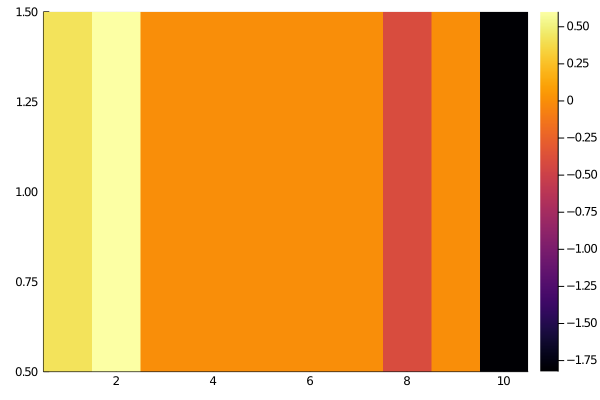

In [39]:
heatmap(G[1:1,:])

In [8]:
@time optimize(M, X, nothing; withqr = true, P = serial)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.321003 seconds (56.81 k allocations: 178.260 MiB, 18.10% gc time)


HermiteMap(10, 100, LinearTransform(100, [-1.9388115412536764, -0.5532840915970996, 0.6649510381692495, 0.8066244424946927, 1.4603598696781142, -1.4589681336803537, -0.9824037374192759, -0.20679245486456055, -1.1291131135026242, 0.6906625282794049  …  -0.37101560389918037, -0.7188384105130516, 1.9141484922491452, -0.41860810828244416, -1.6650320190314736, 1.410747568280138, -1.9536171293522333, 0.2517759861817628, -1.3866687836217055, 0.16619895667801496], [1.003333887605085 0.0 … 0.0 0.0; 0.0 0.889799322434419 … 0.0 0.0; … ; 0.0 0.0 … 1.0213865816432859 0.0; 0.0 0.0 … 0.0 0.9260049299342631], true), MapComponent[MapComponent(10, 10, 1, IntegratedFunction(10, 10, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 9; 10], [0.09564406871613584, -1.5235117095029267, 0.14859370117804918, -4.413286558881069, 0.6568369757672253, -3.796396743470617, 0.7444250305312987

In [ ]:
@time for i=1:Nx
    @show i
    hess_x_log_pdf(M.C[i], X[1:i,:])
end


In [ ]:
@time hess_x_log_pdf(M, X)

i = 1
i = 2
i = 3
i = 

### Integration

In [186]:
Nx = 100
Ny = 50
m = 20
Ne = 400
X = randn(Nx, Ne).*randn(Nx, Ne) #.+ 0.5*randn(Nx).*cos.(randn(Nx, Ne) .* randn(Nx, Ne))

# L = LinearTransform(X)
# transform!(L, X);
# C = MapComponent(m, Nx)
# @time C, _ = optimize(C, X, 10)

In [187]:
M = HermiteMap(m, X);

In [188]:
@time M_noqr = optimize(M, X, 10; P = serial, start = Ny+1);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


 19.530544 seconds (69.35 M allocations: 14.972 GiB, 7.45% gc time)


In [189]:
@time M_qr = optimize(M, X, 10; P = serial, withqr = true, start = Ny+1);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


 10.677751 seconds (44.03 M allocations: 13.718 GiB, 9.93% gc time)


In [31]:
function timing()
    M = HermiteMap(m, X)
    @btime begin 
        optimize($M, $X, $10; P = serial, withqr = false, start = Ny+1)
    end
    
    @btime begin 
        optimize($M, $X, $10; P = serial, withqr = true, start = Ny+1)
    end
end

timing (generic function with 1 method)

In [32]:
timing();

  11.257 s (42606958 allocations: 13.65 GiB)
  21.346 s (45813192 allocations: 21.12 GiB)


In [11]:
timing();

  14.597 s (42433511 allocations: 13.37 GiB)


In [29]:
timing();

  973.450 ms (1054425 allocations: 1.43 GiB)


In [14]:
methods(update_component)

# 1 method for generic function "update_component":
[1] update_component(C::MapComponent, X, reduced_margin::Array{Int64,2}, S::Storage) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/greedyfit.jl:249

In [30]:
function timing()
    @btime begin 
        M = HermiteMap($m, $X)
        optimize($M, $X, $10; P = thread)
    end
end

timing (generic function with 1 method)

In [88]:
timing();

  297.730 ms (1000725 allocations: 1.35 GiB)


### Test optimization with QR

In [45]:
Nx = 3
Ne = 8
m = 20

idx = [0 0 0; 0 0 1; 0 1 0; 0 1 1; 0 1 2; 1 0 0]


Nψ = 6
coeff = [ 0.20649582065364197;
         -0.5150990160472986;
          2.630096893080717;
          1.13653076177397;
          0.6725837371023421;
         -1.3126095306624133]
C = MapComponent(m, Nx, idx, coeff; α = 1e-6);

Ne = 100


# The QR decomposition is not unique!

X = randn(Nx, Ne) .* randn(Nx, Ne) + cos.(randn(Nx, Ne)) .* exp.(-randn(Nx, Ne).^2)

L = LinearTransform(X)
transform!(L, X)
S = Storage(C.I.f, X)
F = QRscaling(S)
newidx = [1 1 1]

Snew = update_storage(S, X, newidx)
Fupdated = updateQRscaling(F, Snew)

Fnew = QRscaling(Snew)

@test norm(Fupdated.D - Fnew.D)<1e-8
@test norm(Fupdated.Dinv - Fnew.Dinv)<1e-8

Test Passed